# Why do you need SHAP values to interpret non-linear ML models?

In [1]:
houses = {
    'BEDROOMS': [3, 3],
    'BATHROOMS': [2, 2],
    'GARAGE': [2, 2],
    'FLOOR_AREA': [200, 201],
    'BUILD_YEAR': [2000, 2000]
}

import pandas as pd
df_house = pd.DataFrame(houses)
df_house

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR
0,3,2,2,200,2000
1,3,2,2,201,2000


## Load data

In [2]:
df_base = pd.read_csv('../../../data/house_perth/output/ml_simple.csv', index_col=0)
df_base

,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,109,2011.0
1 McKenzie Corner,470000,4,2,2.0,279,2005.0
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,177,2005.0
98 Centennial Avenue,441000,4,2,2.0,195,2004.0


In [3]:
y = df_base['PRICE']
X = df_base.drop(columns='PRICE')

## Linear models

In [4]:
from sklearn.linear_model import LinearRegression

model_l = LinearRegression()
model_l.fit(X, y)

LinearRegression()

In [5]:
pd.DataFrame({
    'PRICE': y,
    'PRICE_PRED': model_l.predict(X)
})

,PRICE,PRICE_PRED
ADDRESS,,
1 Datchet Turn,270000,289751.667238
1 McKenzie Corner,470000,508673.677212
...,...,...
93 Centennial Avenue,350000,398450.775979
98 Centennial Avenue,441000,420370.151221


In [6]:
model_l.score(X, y)

0.5881533749382085

In [7]:
model_l.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'BUILD_YEAR'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([20407.52444216, -5446.13921643,  1952.49704666,  1080.61667876,
        -2468.27502394]),
 'rank_': 5,
 'singular_': array([530.86671669,  37.87460383,   8.72349157,   5.89859143,
          1.46656318]),
 'intercept_': 5081430.233404352}

In [8]:
df = df_house.copy()
df['PRICE'] = model_l.predict(df)
df['PRICE_DIF'] = df['PRICE'].diff()
df

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,PRICE,PRICE_DIF
0,3,2,2,200,2000,415238.810268,NaN
1,3,2,2,201,2000,416319.426947,1080.616679


## Non-linear model

In [9]:
from sklearn.tree import DecisionTreeRegressor

model_nl = DecisionTreeRegressor()
model_nl.fit(X, y)

DecisionTreeRegressor()

In [10]:
pd.DataFrame({
    'PRICE': y,
    'PRICE_PRED': model_nl.predict(X)
})

,PRICE,PRICE_PRED
ADDRESS,,
1 Datchet Turn,270000,270000.0
1 McKenzie Corner,470000,470000.0
...,...,...
93 Centennial Avenue,350000,350000.0
98 Centennial Avenue,441000,441000.0


In [11]:
model_nl.score(X, y)

0.9746449876358452

In [12]:
model_nl.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'BUILD_YEAR'],
       dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x163f4ab10>}

In [13]:
df = df_house.copy()
df['PRICE'] = model_nl.predict(df)
df['PRICE_DIF'] = df['PRICE'].diff()
df

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,PRICE,PRICE_DIF
0,3,2,2,200,2000,373000.0,NaN
1,3,2,2,201,2000,425000.0,52000.0


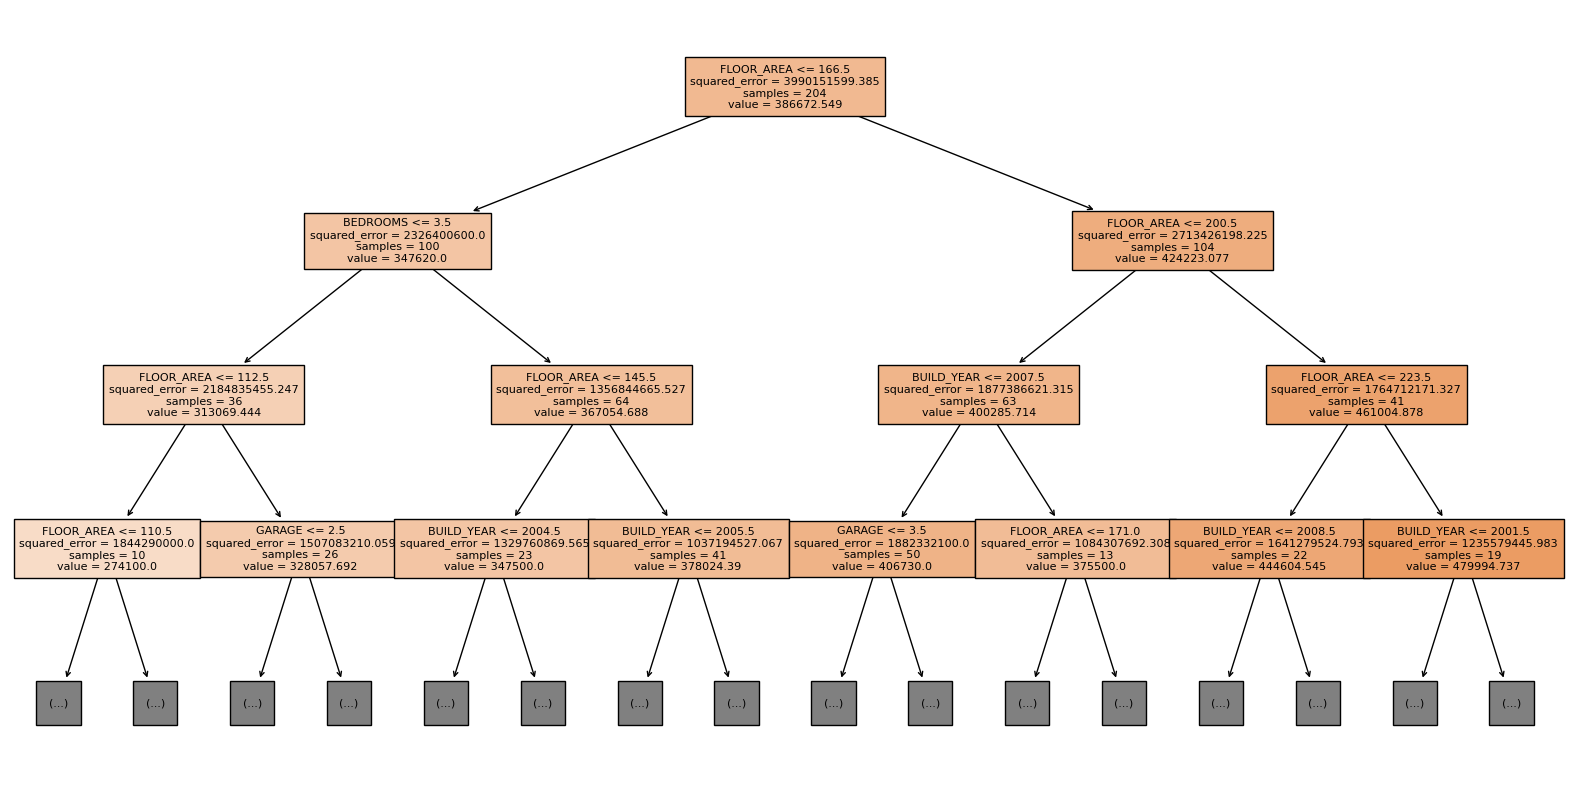

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model_nl, max_depth=3, fontsize=8, feature_names=X.columns.tolist(), filled=True);

<Axes: >

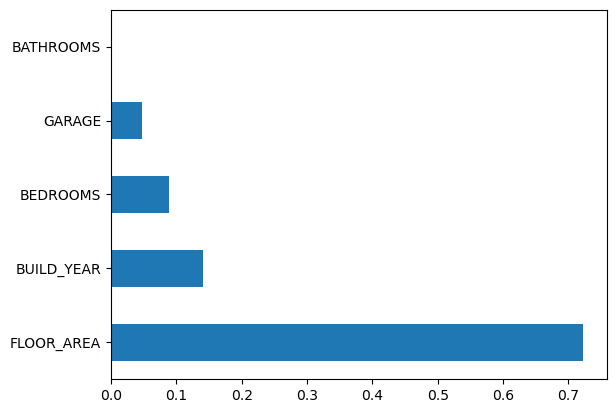

In [15]:
fi = model_nl.feature_importances_
fn = model_nl.feature_names_in_

pd.Series(fi, index=fn).sort_values(ascending=False).plot.barh()

## How to interpret non-linear models?

- SHAP Values

In [16]:
import shap

explainer = shap.TreeExplainer(model_nl)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Houses examples

In [17]:
shap_values = explainer.shap_values(df_house)

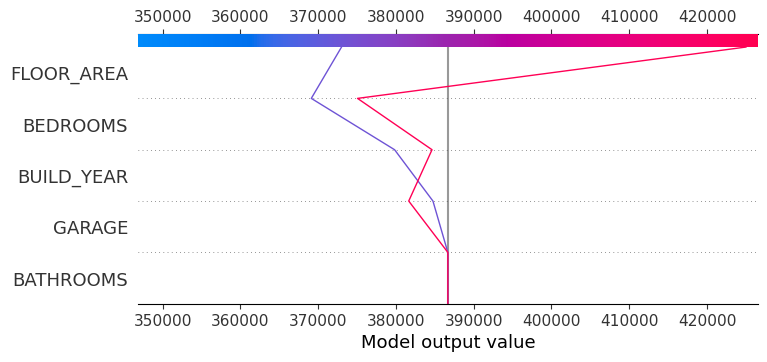

In [18]:
shap.decision_plot(explainer.expected_value, shap_values, df_house)

In [19]:
shap.initjs()

In [20]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], df_house.iloc[row])

In [21]:
row = 1
shap.force_plot(explainer.expected_value, shap_values[row], df_house.iloc[row])

### Full data

In [22]:
shap_values = explainer.shap_values(X)

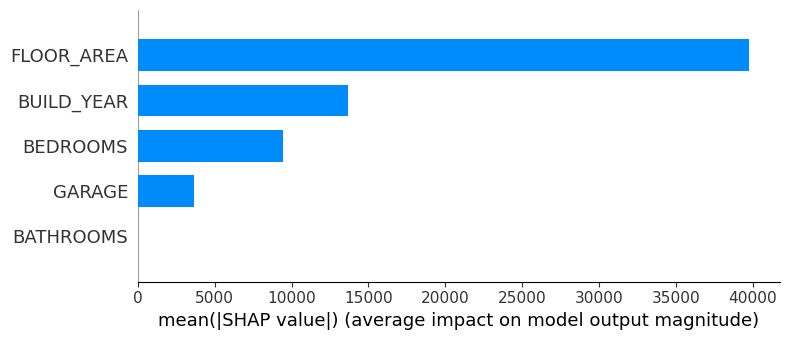

In [23]:
shap.summary_plot(shap_values, X, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


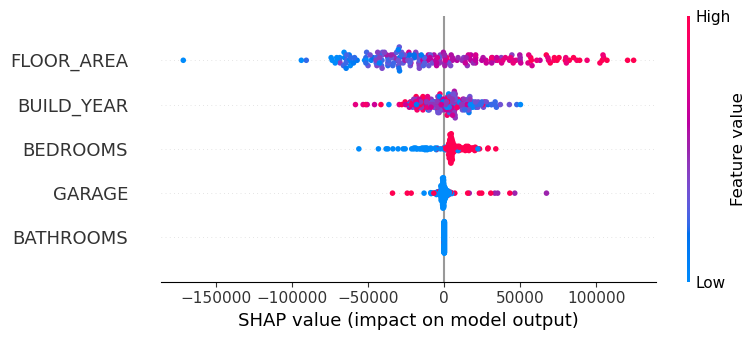

In [24]:
shap.summary_plot(shap_values, X)

In [25]:
shap.plots.force(explainer.expected_value, shap_values, X)

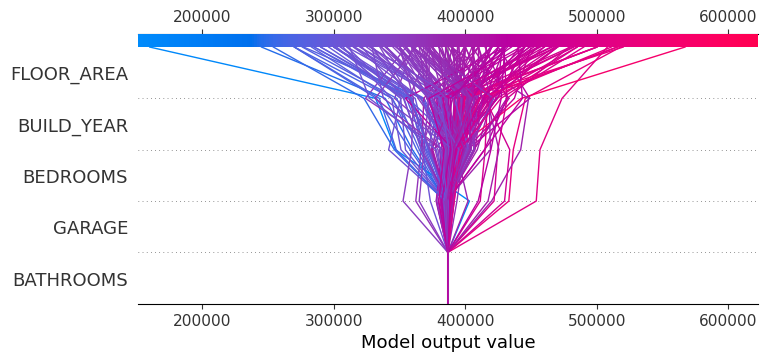

In [26]:
shap.decision_plot(explainer.expected_value, shap_values, X)

In [27]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row])

In [28]:
row = 4
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row])

In [29]:
row = 14
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row])

## Theory behind SHAP values
### Shapley values from game theory
https://www.youtube.com/watch?v=w9O0fkfMkx0

### Permutation importance

- https://www.youtube.com/watch?v=-taOhqkiuIo
- https://www.kaggle.com/code/dansbecker/permutation-importance